log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: ../mod_c/mod_e_center_high_res.hdf5 -1186693.36627 -78.9746106984
log-like, TS: ../mod_c/mod_e_center_high_res_XCO.hdf5 -1186516.78772 -432.131723268


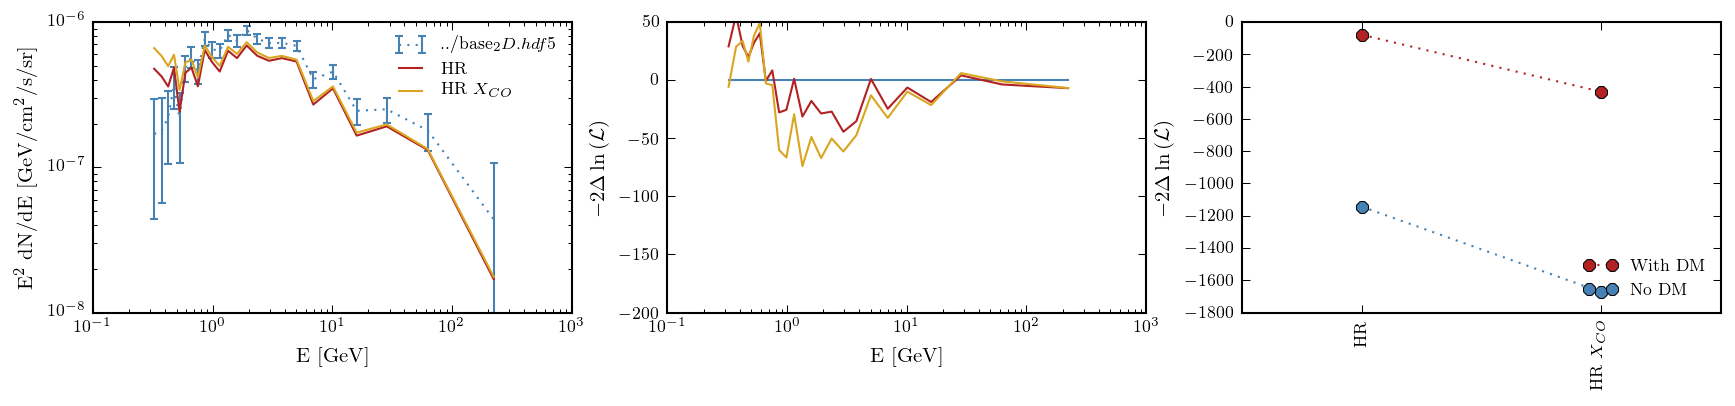

In [38]:
import cPickle as pickle
import h5py

def PlotSeries(start, stop, text,labels, ylim=None, mod=1):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + ['mod_e_%i_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../base_2D.hdf5')
    h_center_HR = h5py.File('../mod_c/mod_e_center_high_res.hdf5')
    
    print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        try:
            h_base = h5py.File('../base_2D.hdf5')
            h = h5py.File('../mod_c/'+model)
            #try:
            h['/fit_results/GC/'].attrs.keys()
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(131)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(132)
            
            #print h_base['/fit_results/GC/'].attrs.keys()
            if i%mod==0:
                TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
                plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e-10)
            print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)

def PlotModels(pathList, text,labels, ylim=None):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + pathList
    h_base = h5py.File('../base_2D.hdf5')
    
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        #try:
        h_base = h5py.File('../base_2D.hdf5')
        h = h5py.File('../mod_c/'+model)
        #try:
        h['/fit_results/GC/'].attrs.keys()
        fit = h['/fit_results/GC'].attrs
        fit_no_dm = h['/fit_results/GC_no_dm'].attrs
        print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
        ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
        ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
        #print fit.keys()
        E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']

        plt.subplot(131)

        if i==0:
            plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                         label=model,capthick=1, capsize=2, ls=':' )
        else:
            plt.errorbar(E/1e3,(E**2*flux/1e3), 
                         label=labels[i-1],capthick=1, capsize=2, ls='-' )

        plt.subplot(132)

        #print h_base['/fit_results/GC/'].attrs.keys()
       
        TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
        plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e-10)
#             print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)


PlotModels(['../mod_c/mod_e_center_high_res.hdf5','../mod_c/mod_e_center_high_res_XCO.hdf5'], text='High-Res CR', labels=['HR','HR $X_{CO}$'])



log-like, TS: center_high_res_no_dm -1186161.14316 627.731872933
log-like, TS: center_high_res -1186693.36627 -78.9746106984
log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_e_0_stripped.hdf5 -1186355.81189 -754.083366043
log-like, TS: mod_e_1_stripped.hdf5 -1186434.58194 -596.54327366
log-like, TS: mod_e_2_stripped.hdf5 -1186488.26334 -489.180483214
log-like, TS: mod_e_3_stripped.hdf5 -1186518.00267 -429.701807384
log-like, TS: mod_e_4_stripped.hdf5 -1186524.88464 -415.937879329
log-like, TS: mod_e_5_stripped.hdf5 -1186510.03874 -445.629681284
log-like, TS: mod_e_6_stripped.hdf5 -1186474.52886 -516.649429426
log-like, TS: mod_e_7_stripped.hdf5 -1186419.41473 -626.877686375
log-like, TS: mod_e_8_stripped.hdf5 -1186345.64871 -774.409737478
log-like, TS: mod_e_9_stripped.hdf5 -1186254.14786 -957.411440981


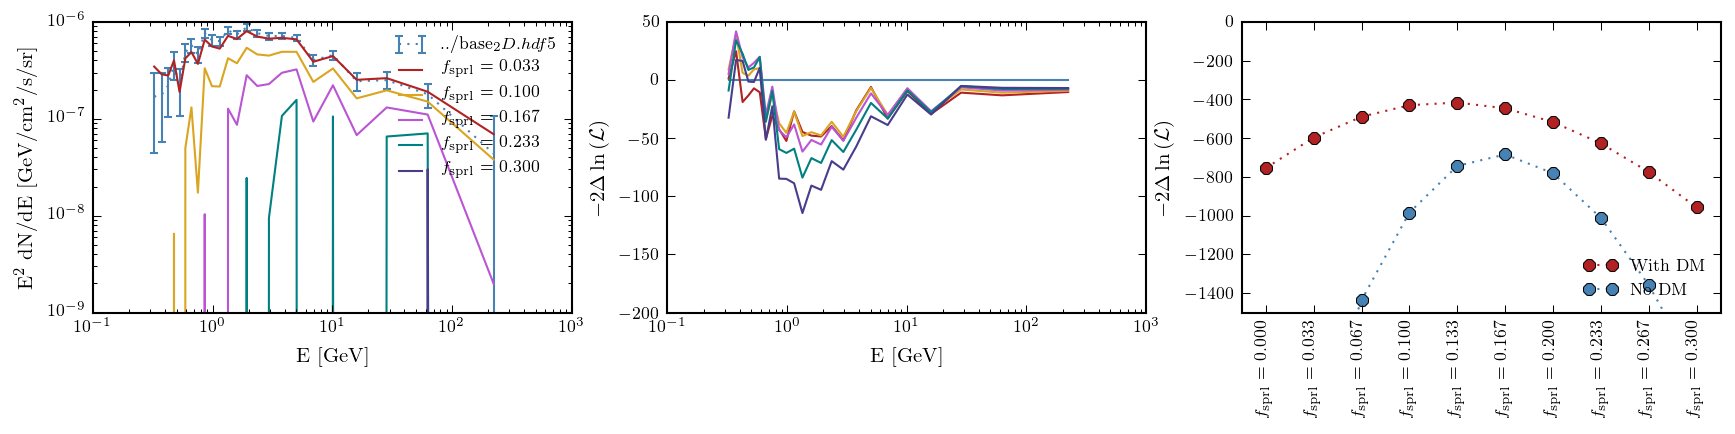

In [25]:
PlotSeries(start=0, stop=10, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.30,10)], mod=2, ylim=(-1500,0))

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_e_10_stripped.hdf5 -1185798.23336 -1869.24042576
log-like, TS: mod_e_11_stripped.hdf5 -1186262.78594 -940.135273789
log-like, TS: mod_e_12_stripped.hdf5 -1186467.40133 -530.904503503
log-like, TS: mod_e_13_stripped.hdf5 -1186474.52886 -516.649429426
log-like, TS: mod_e_14_stripped.hdf5 -1186335.91718 -793.872787117
log-like, TS: mod_e_15_stripped.hdf5 -1186044.29671 -1377.11374002
log-like, TS: mod_e_16_stripped.hdf5 -1185775.26783 -1915.17149441
log-like, TS: mod_e_17_stripped.hdf5 -1185662.75994 -2140.18727824
log-like, TS: mod_e_18_stripped.hdf5 -1185546.58073 -2372.54569874
log-like, TS: mod_e_19_stripped.hdf5 -1185416.00673 -2633.69369975
log-like, TS: mod_e_20_stripped.hdf5 no results found for model  mod_e_20_stripped.hdf5


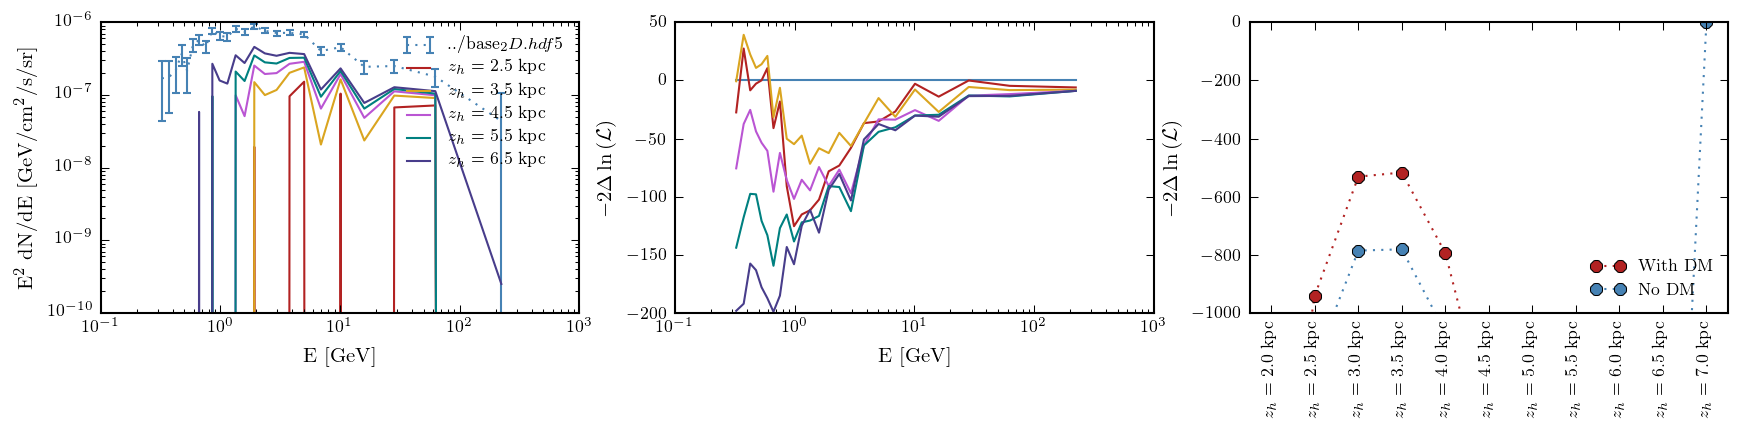

In [15]:
PlotSeries(start=10, stop=21, text='Halo Height', labels=[r'$z_h='+str(i)+'$ kpc' for i in np.linspace(2,7,11)], ylim=(-1000,0), mod=2)

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_e_21_stripped.hdf5 -1185354.10322 -2757.50072375
log-like, TS: mod_e_22_stripped.hdf5 -1186474.52886 -516.649429426
log-like, TS: mod_e_23_stripped.hdf5 -1186248.59573 -968.51570155
log-like, TS: mod_e_24_stripped.hdf5 -1185971.32334 -1523.06047416


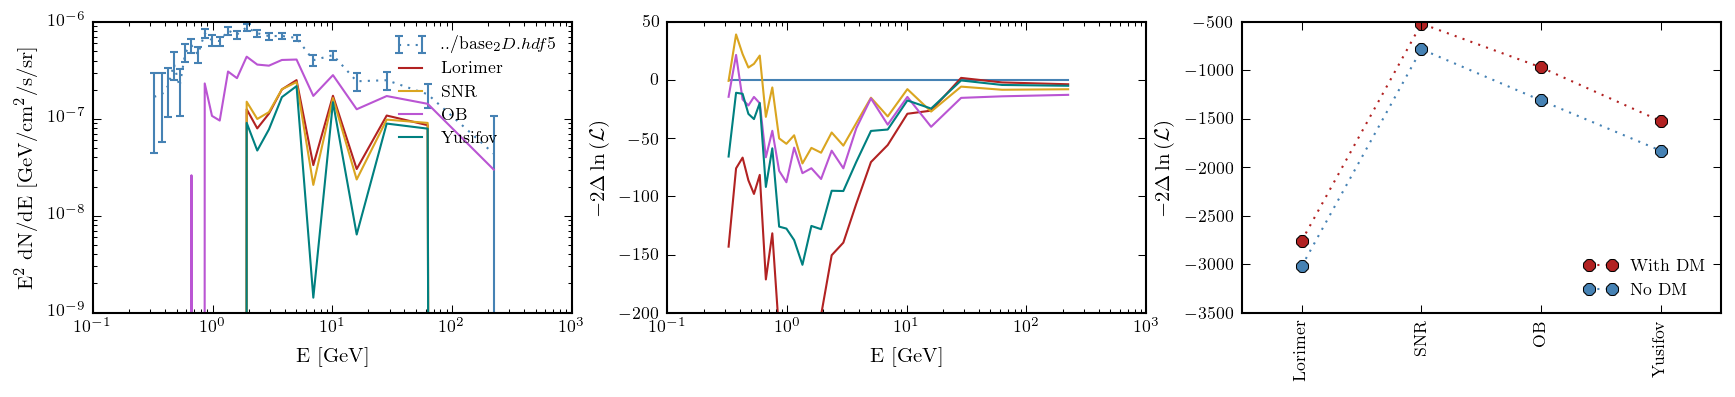

In [5]:
PlotSeries(start=21, stop=25, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'))

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_e_25_stripped.hdf5 -1185841.99192 -1781.72332135
log-like, TS: mod_e_26_stripped.hdf5 -1184878.02427 -3709.65860634
log-like, TS: mod_e_27_stripped.hdf5 -1186474.52886 -516.649429426
log-like, TS: mod_e_28_stripped.hdf5 -1185428.00761 -2609.69192544


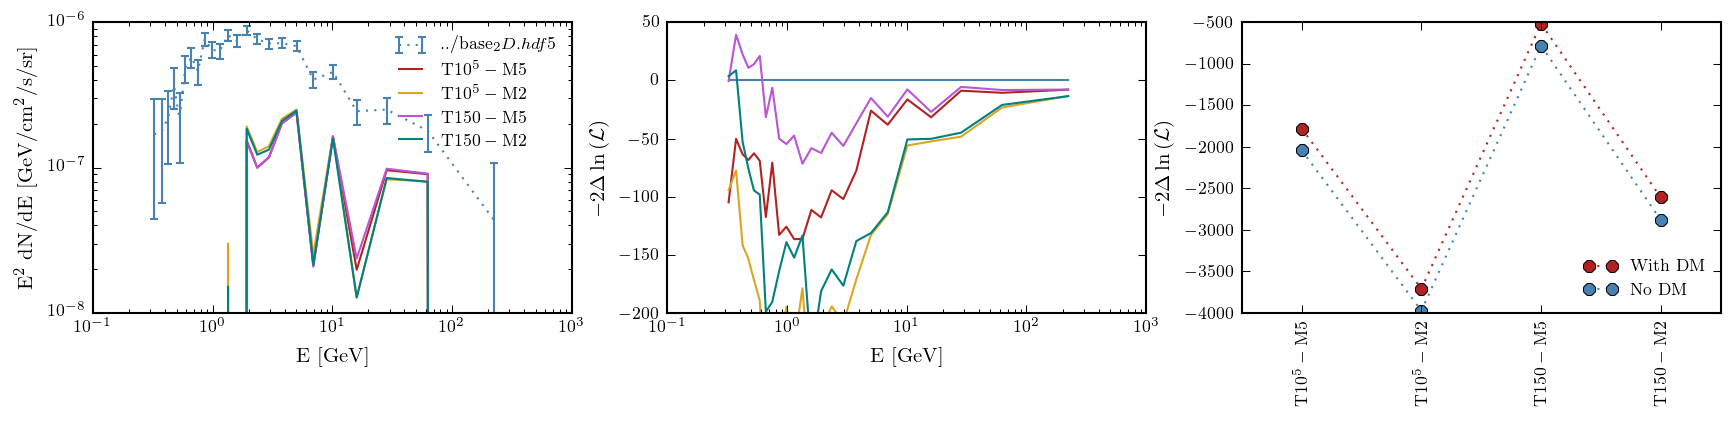

In [6]:
PlotSeries(start=25, stop=29, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'))

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_e_29_stripped.hdf5 -1183140.27817 -7185.15080923
no results found for model  mod_e_30_stripped.hdf5
log-like, TS: mod_e_31_stripped.hdf5 no results found for model  mod_e_31_stripped.hdf5
log-like, TS: mod_e_32_stripped.hdf5 -1186535.31892 -395.069306117
log-like, TS: mod_e_33_stripped.hdf5 -1186474.61946 -516.468243356
log-like, TS: mod_e_34_stripped.hdf5 -1186395.4503 -674.806555518
log-like, TS: mod_e_35_stripped.hdf5 -1186345.48926 -774.728644256
log-like, TS: mod_e_36_stripped.hdf5 -1186309.73991 -846.227335029


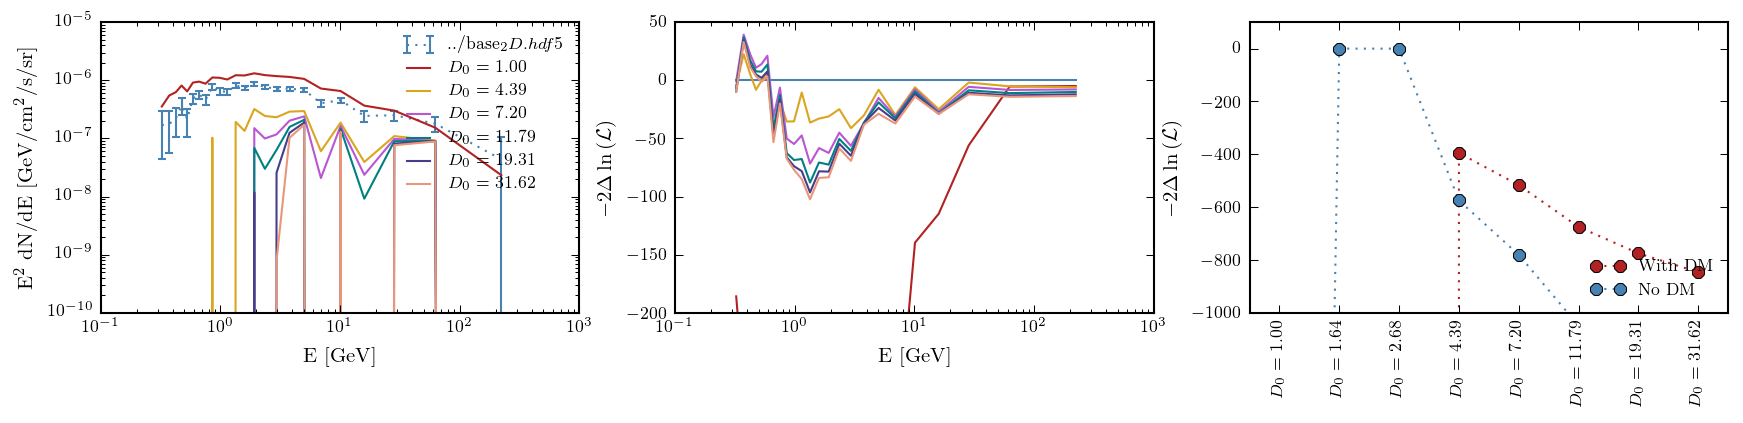

In [22]:
PlotSeries(start=29, stop=37, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,29.5,8)/1e28],ylim=(-1000,100))

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_e_37_stripped.hdf5 -1186422.84753 -620.012088671
log-like, TS: mod_e_38_stripped.hdf5 -1186489.44112 -486.824905997
log-like, TS: mod_e_39_stripped.hdf5 -1186435.62559 -594.455972786
log-like, TS: mod_e_40_stripped.hdf5 no results found for model  mod_e_40_stripped.hdf5
log-like, TS: mod_e_41_stripped.hdf5 no results found for model  mod_e_41_stripped.hdf5
log-like, TS: mod_e_42_stripped.hdf5 no results found for model  mod_e_42_stripped.hdf5
log-like, TS: mod_e_43_stripped.hdf5 -1184964.33183 -3537.04348567
log-like, TS: mod_e_44_stripped.hdf5 -1184926.4279 -3612.85134641


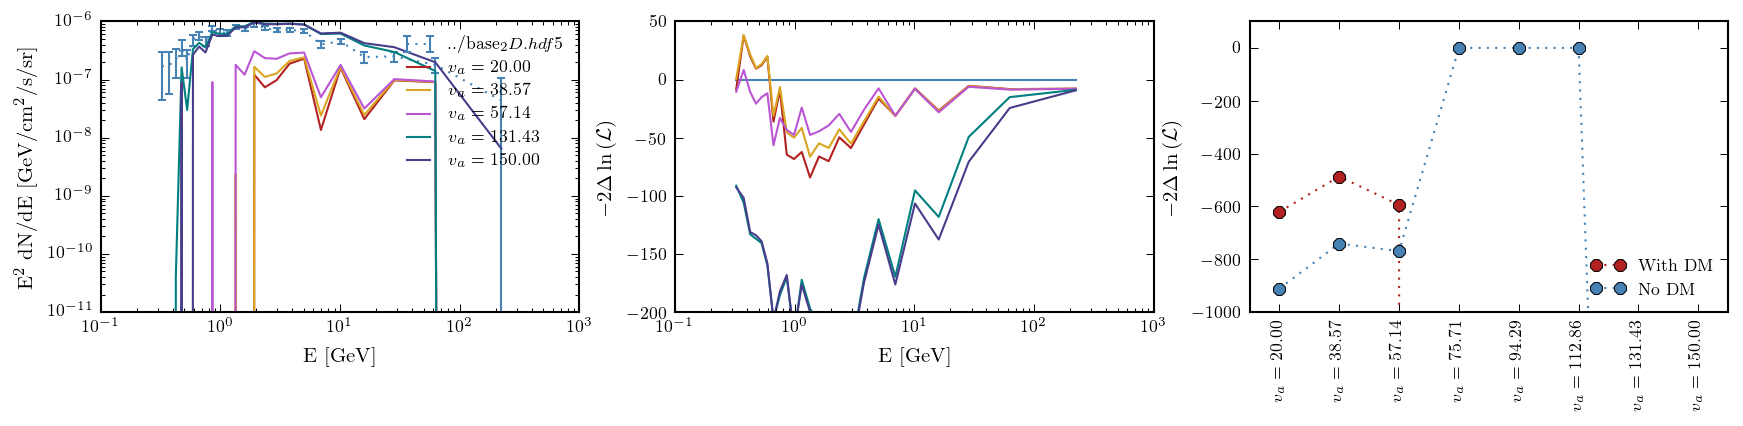

In [17]:
PlotSeries(start=37, stop=45, text=r'\noindent Alfven Velocity $v_A $\newline $\rm [km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(20,150,8)], ylim=(-1000,100))

In [9]:
#PlotSeries(start=33, stop=39, text=r'\noindent Convection $dv/dz$\newline $\rm [km\ s^{-1}\ kpc^{-1}]$', labels=['$dvdz=%2.2f' % v + '$' for v in np.linspace(0,500,6)])

log-like, TS: ../base_2D.hdf5 -1186732.85358 0.0
log-like, TS: mod_e_45_stripped.hdf5 -1186348.68421 -768.338735951
log-like, TS: mod_e_46_stripped.hdf5 -1186378.83987 -708.027415833
log-like, TS: mod_e_47_stripped.hdf5 -1186426.83388 -612.039399234
log-like, TS: mod_e_48_stripped.hdf5 -1186462.06196 -541.583238055
log-like, TS: mod_e_49_stripped.hdf5 -1186479.89337 -505.920422641
log-like, TS: mod_e_50_stripped.hdf5 -1186486.67386 -492.359431585
log-like, TS: mod_e_51_stripped.hdf5 -1186489.49311 -486.720938403
log-like, TS: mod_e_52_stripped.hdf5 -1186492.38325 -480.940660621
log-like, TS: mod_e_53_stripped.hdf5 -1186496.91199 -471.883166898
log-like, TS: mod_e_54_stripped.hdf5 -1186503.27555 -459.156056015
no results found for model  mod_e_55_stripped.hdf5


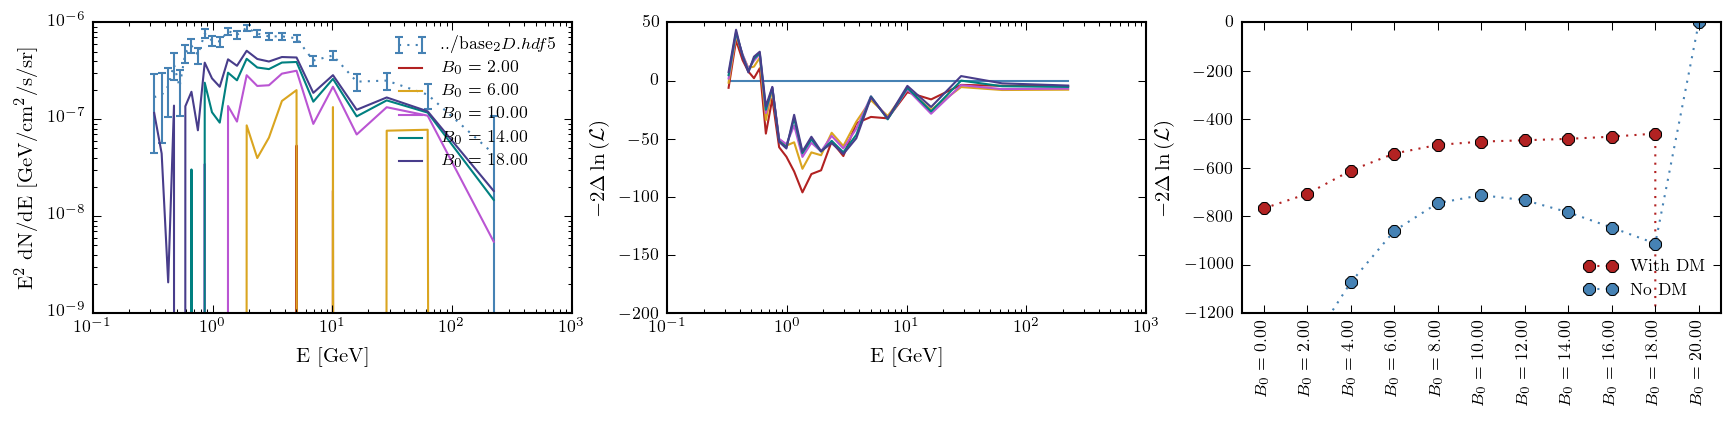

In [10]:
PlotSeries(start=45, stop=56, text=r'\noindent Magnetic Field $B_0\ \rm{[\mu G]}$', labels=['$B_0=%2.2f' % v + '$' for v in np.linspace(0,20,11)], ylim=(-1200,0), mod=2)

In [11]:
#PlotSeries(start=47, stop=53, text=r'\noindent Magnetic Field $r_B$ $\rm [kpc]$', labels=['$r_b=%2.2f' % v + '$' for v in np.linspace(5,10,6)])

In [12]:
#PlotSeries(start=53, stop=59, text=r'\noindent Magnetic Field $z_B$ $\rm [kpc]$', labels=['$z_b=%2.2f' % v + '$' for v in np.linspace(1,4,6)])

In [13]:
#PlotSeries(start=69, stop=80, text=r'\noindent Source Spiral Fraction$', labels=[r'$f_{\rm sprl}=%2.2f' % v + '$' for v in np.linspace(0,.15,16)])

In [14]:
#PlotSeries(start=65, stop=73, text=r'\noindent ISRF OPT+FIR', labels=[r'$\rm isrf_{opt,fir}=%2.2f' % v + '$' for v in np.linspace(.5,3,8)])